# Importing All the files and modules which is required to create this model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [2]:
df=pd.read_csv("station_day.csv")
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [3]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df.shape

(108035, 16)

In [5]:
df.isnull().sum()

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [6]:
median1=df['PM2.5'].median()
print(median1)

55.95


In [7]:
df['PM2.5'].fillna(median1,inplace=True)

In [8]:
median2=df['PM10'].median()
print(median2)

122.09


In [9]:
df['PM10'].fillna(median2,inplace=True)

In [10]:
median3=df['NO'].median()
print(median3)

10.29


In [11]:
df['NO'].fillna(median3,inplace=True)

In [12]:
median4=df['NO2'].median()
print(median4)

27.21


In [13]:
df['NO2'].fillna(median4,inplace=True)

In [14]:
median5=df['NOx'].median()
print(median5)

26.66


In [15]:
df['NOx'].fillna(median5,inplace=True)

In [16]:
median6=df['NH3'].median()
print(median6)

23.59


In [17]:
df['NH3'].fillna(median6,inplace=True)

In [18]:
median7=df['CO'].median()
print(median7)

0.91


In [19]:
df['CO'].fillna(median7,inplace=True)

In [20]:
median8=df['SO2'].median()
print(median8)

8.95


In [21]:
df['SO2'].fillna(median8,inplace=True)

In [22]:
median9=df['O3'].median()
print(median9)

30.84


In [23]:
df['O3'].fillna(median9,inplace=True)

In [24]:
median10=df['Benzene'].median()
print(median10)

1.21


In [25]:
df['Benzene'].fillna(median10,inplace=True)

In [26]:
median11=df['Toluene'].median()
print(median11)

4.33


In [27]:
df['Toluene'].fillna(median11,inplace=True)

In [28]:
median12=df['Xylene'].median()
print(median12)

0.4


In [29]:
df['Xylene'].fillna(median12,inplace=True)

In [30]:
median13=df['AQI'].median()
print(median13)

132.0


In [31]:
df['AQI'].fillna(median13,inplace=True)

In [32]:
df.isnull().sum()

StationId         0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket    21010
dtype: int64

In [33]:
df['AQI_Bucket'].value_counts()

Moderate        29417
Satisfactory    23636
Very Poor       11762
Poor            11493
Good             5510
Severe           5207
Name: AQI_Bucket, dtype: int64

In [34]:
df['AQI_Bucket'].fillna('Missing',inplace=True)

In [35]:
df.isnull().sum()

StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [36]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,132.0,Missing
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [43]:
df['Day']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.day
df['Month']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.month
df['Year']=pd.to_datetime(df.Date,format="%Y-%m-%d").dt.year

In [44]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,132.0,Missing,24,11,2017
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,25,11,2017
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,26,11,2017
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,27,11,2017
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,28,11,2017


In [45]:
df['AQI_Bucket'].value_counts()

Moderate        29417
Satisfactory    23636
Missing         21010
Very Poor       11762
Poor            11493
Good             5510
Severe           5207
Name: AQI_Bucket, dtype: int64

C:\Users\Somesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


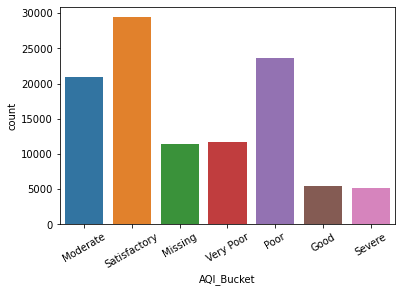

In [46]:
g=sns.countplot('AQI_Bucket',data=df)
g.set_xticklabels(labels=["Moderate","Satisfactory","Missing","Very Poor","Poor","Good","Severe"],rotation=30)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='AQI'>

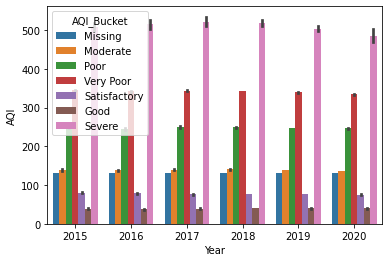

In [47]:
sns.barplot(x='Year',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='Year', ylabel='AQI'>

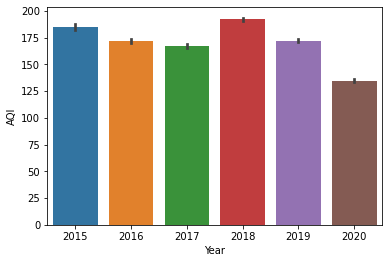

In [48]:
sns.barplot(x='Year',y='AQI',data=df)

<AxesSubplot:xlabel='Month', ylabel='AQI'>

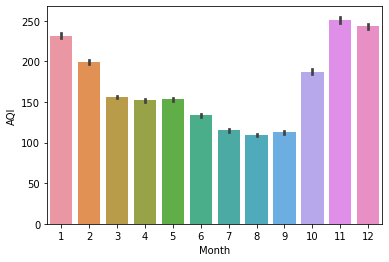

In [49]:
sns.barplot(x='Month',y='AQI',data=df)

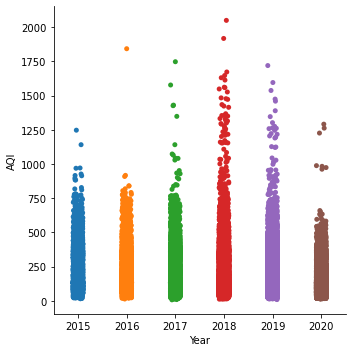

In [50]:
sns.catplot(x='Year',y='AQI',data=df)

<AxesSubplot:xlabel='NO', ylabel='AQI'>

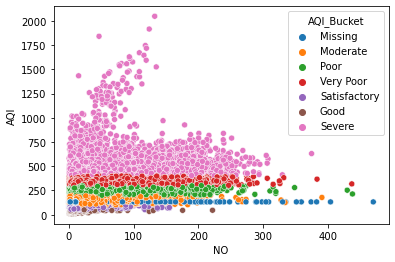

In [51]:
sns.scatterplot(x='NO',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='NO2', ylabel='AQI'>

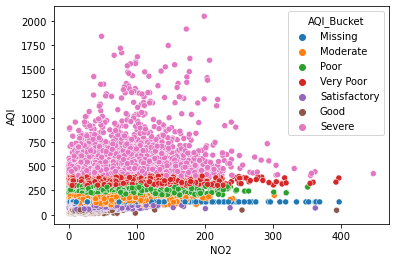

In [52]:
sns.scatterplot(x='NO2',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='CO', ylabel='AQI'>

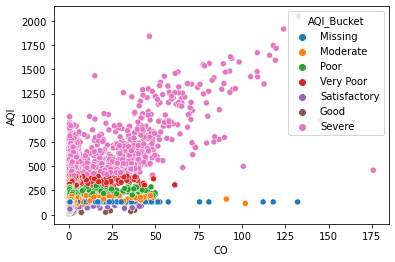

In [53]:
sns.scatterplot(x='CO',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='SO2', ylabel='AQI'>

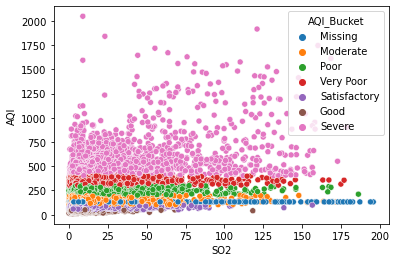

In [54]:
sns.scatterplot(x='SO2',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='NH3', ylabel='AQI'>

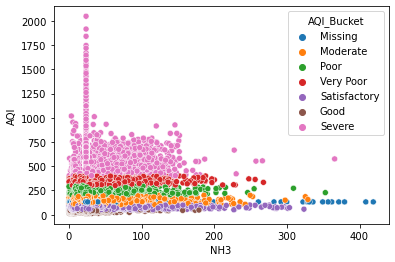

In [55]:
sns.scatterplot(x='NH3',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='O3', ylabel='AQI'>

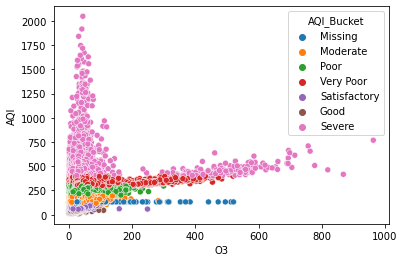

In [56]:
sns.scatterplot(x='O3',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='Benzene', ylabel='AQI'>

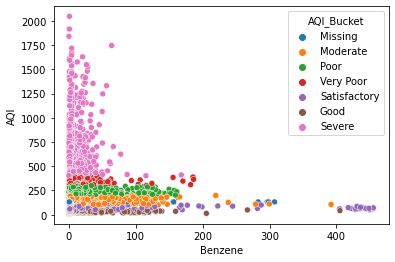

In [57]:
sns.scatterplot(x='Benzene',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='Toluene', ylabel='AQI'>

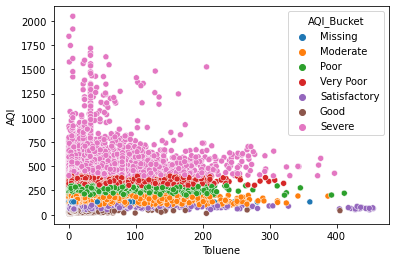

In [58]:
sns.scatterplot(x='Toluene',y='AQI',hue='AQI_Bucket',data=df)

<AxesSubplot:xlabel='Xylene', ylabel='AQI'>

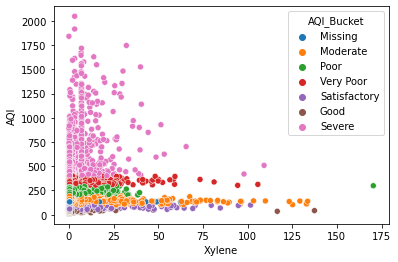

In [59]:
sns.scatterplot(x='Xylene',y='AQI',hue='AQI_Bucket',data=df)

In [60]:
df['AQI_Bucket'].replace(to_replace="Missing",value=0,inplace=True)
df['AQI_Bucket'].replace(to_replace="Moderate",value=1,inplace=True)
df['AQI_Bucket'].replace(to_replace="Poor",value=2,inplace=True)
df['AQI_Bucket'].replace(to_replace="Very Poor",value=3,inplace=True)
df['AQI_Bucket'].replace(to_replace="Satisfactory",value=4,inplace=True)
df['AQI_Bucket'].replace(to_replace="Good",value=5,inplace=True)
df['AQI_Bucket'].replace(to_replace="Severe",value=6,inplace=True)

In [61]:
df['AQI_Bucket'].value_counts()

1    29417
4    23636
0    21010
3    11762
2    11493
5     5510
6     5207
Name: AQI_Bucket, dtype: int64

In [62]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day,Month,Year
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,132.0,0,24,11,2017
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,1,25,11,2017
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,1,26,11,2017
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,1,27,11,2017
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,1,28,11,2017


In [63]:
X=df.drop(['StationId','Date','AQI_Bucket','NOx','AQI','Day','Month','Year'],axis=1)#classification independent
y=df['AQI_Bucket']#classification dependent
W=df.drop(['StationId','Date','AQI','NOx','AQI_Bucket','Day','Month','Year'],axis=1)#Regression independent
z=df['AQI']#Regression dependent

In [64]:
X.shape

(108035, 11)

In [65]:
y.shape

(108035,)

In [66]:
W.shape

(108035, 11)

In [67]:
z.shape

(108035,)

In [68]:
X.corr()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.689865,0.475926,0.430728,0.334874,0.089130,0.164388,0.133146,0.105547,0.262099,0.014183
PM10,0.689865,1.000000,0.475274,0.415650,0.348346,0.065876,0.192791,0.063613,0.106865,0.314234,-0.012207
NO,0.475926,0.475274,1.000000,0.572610,0.295311,0.130215,0.168216,0.029948,0.143590,0.259061,0.010639
NO2,0.430728,0.415650,0.572610,1.000000,0.330701,0.172530,0.277746,0.215619,0.114045,0.285210,0.082606
NH3,0.334874,0.348346,0.295311,0.330701,1.000000,0.037150,0.079512,0.099755,0.036483,0.173028,-0.050312
CO,0.089130,0.065876,0.130215,0.172530,0.037150,1.000000,0.355839,0.013817,0.054529,0.118493,0.118008
SO2,0.164388,0.192791,0.168216,0.277746,0.079512,0.355839,1.000000,0.137527,0.069165,0.209961,0.163223
O3,0.133146,0.063613,0.029948,0.215619,0.099755,0.013817,0.137527,1.000000,0.012108,0.101639,0.002803
Benzene,0.105547,0.106865,0.143590,0.114045,0.036483,0.054529,0.069165,0.012108,1.000000,0.420456,0.103685
Toluene,0.262099,0.314234,0.259061,0.285210,0.173028,0.118493,0.209961,0.101639,0.420456,1.000000,0.174521


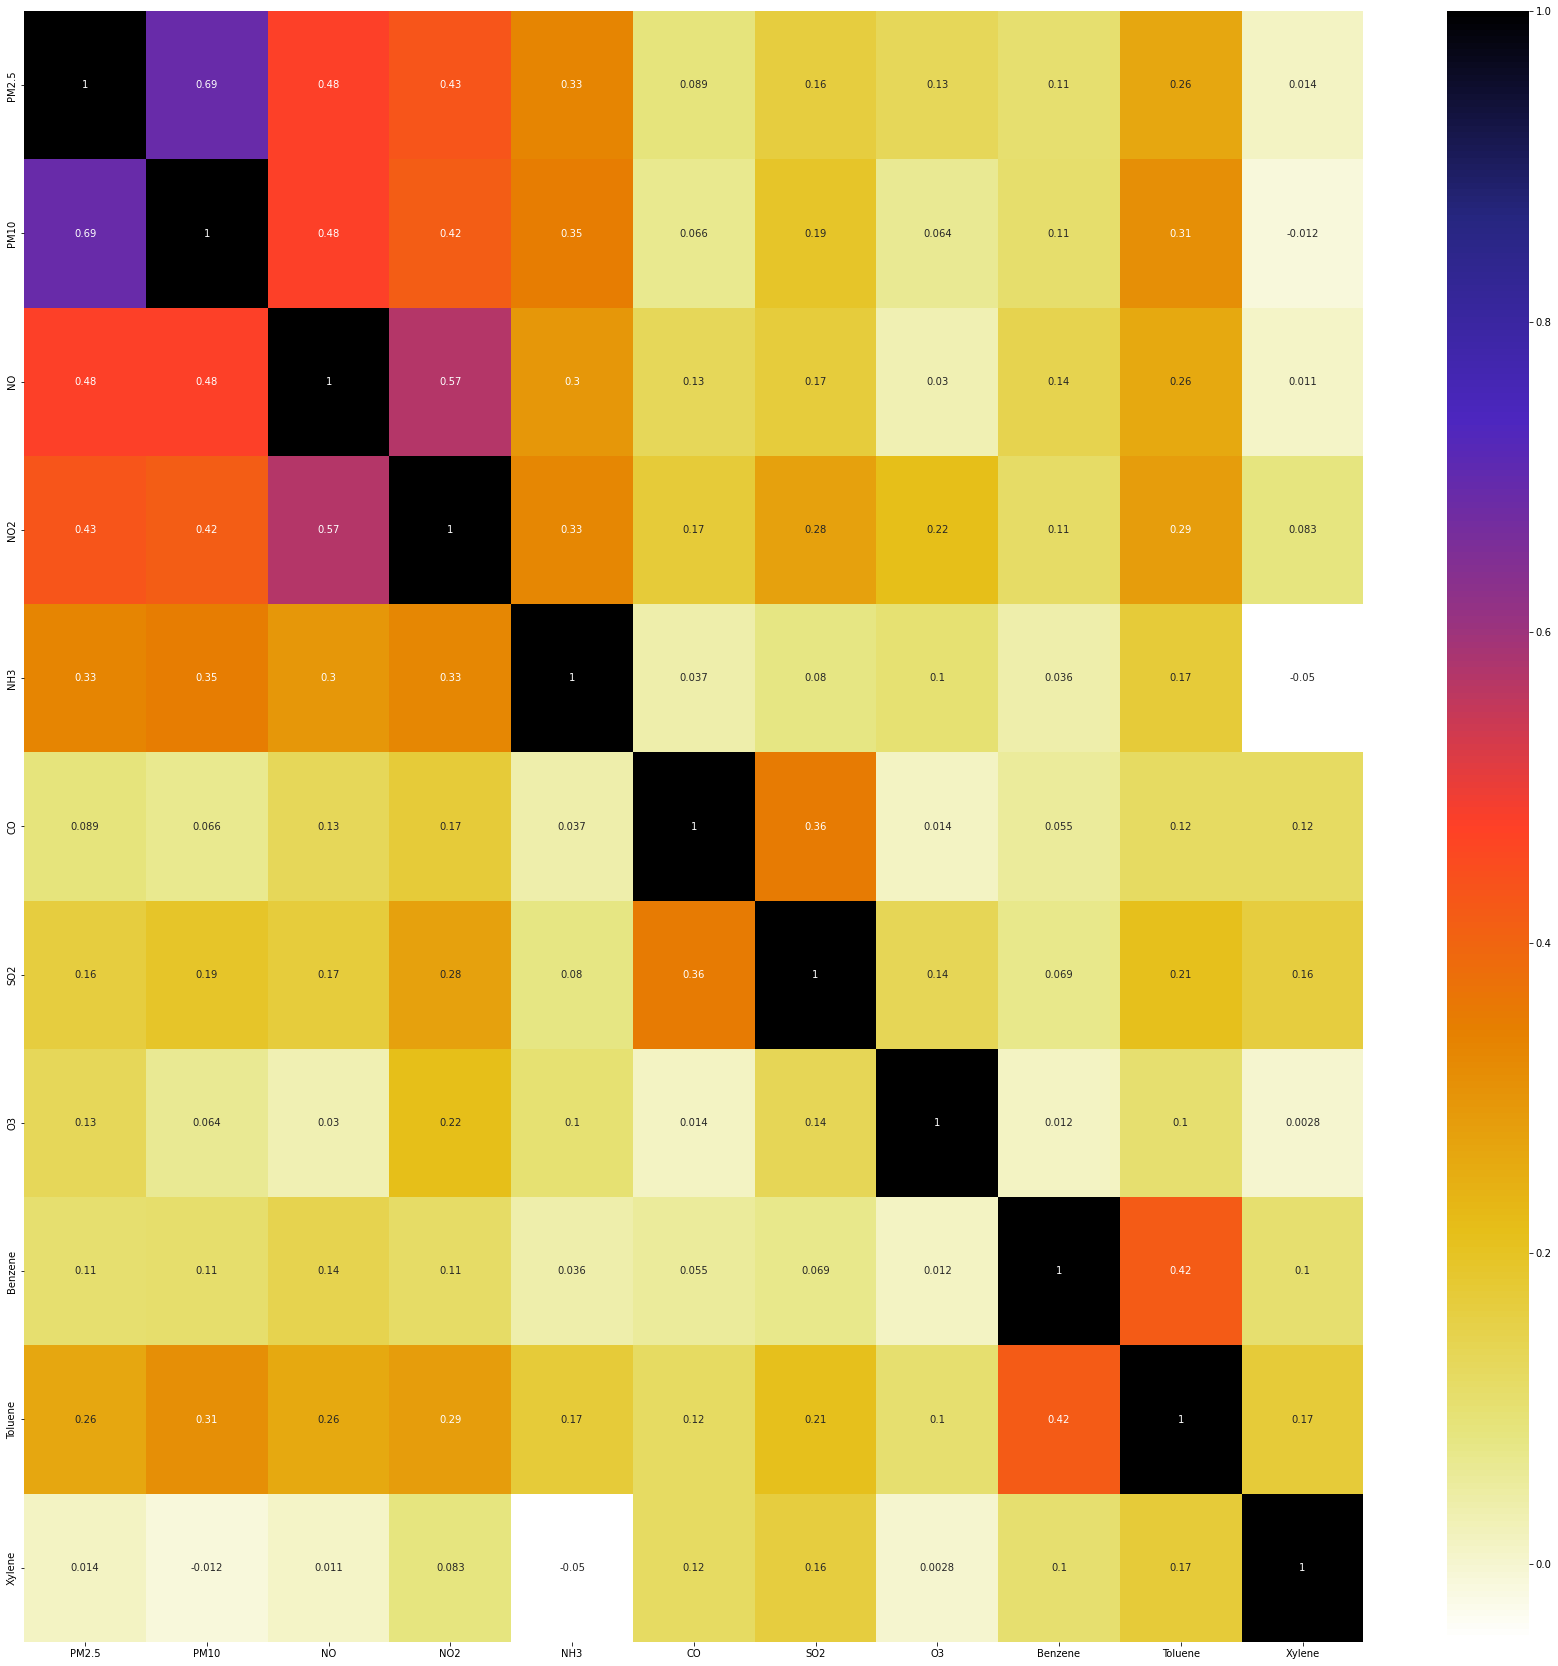

In [69]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [70]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [71]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

0

In [72]:
corr_features

set()

In [73]:
X.shape

(108035, 11)

In [74]:
W.shape

(108035, 11)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)#for classification
X_train1,X_test1,y_train1,y_test1=train_test_split(W,z,test_size=0.3,random_state=42)#for regression

In [76]:
X_train.shape

(75624, 11)

In [77]:
X_test.shape

(32411, 11)

In [78]:
y_train.shape

(75624,)

In [79]:
y_test.shape

(32411,)

In [80]:
X_train.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
69271,35.45,78.48,43.56,19.28,28.95,1.27,3.58,30.84,3.90,5.24,0.73
14196,55.95,122.09,10.29,27.21,23.59,0.91,8.95,30.84,1.21,4.33,0.40
38054,27.94,42.69,2.01,6.34,53.27,0.55,6.20,19.66,0.10,0.48,0.40
25339,32.17,60.83,6.30,41.11,46.34,0.70,5.08,22.32,1.40,49.18,0.40
78088,93.41,244.58,22.13,18.51,11.43,1.84,38.31,42.60,0.00,0.00,0.40


In [81]:
y_train.head()

69271    4
14196    0
38054    5
25339    4
78088    1
Name: AQI_Bucket, dtype: int64

In [82]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [83]:
y_pred

array([2, 3, 4, ..., 3, 0, 4], dtype=int64)

In [84]:
print("Accuracy Score:\n",accuracy_score(y_pred,y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))

Accuracy Score:
 80.62386226898275
Confusion Matrix:
 [[5350   43   10   17   34   20    7]
 [ 334 7306  773   36  871    8    5]
 [  87  517 2236  428   12    0   21]
 [  95   26  445 2898    3    0  257]
 [ 275  924   15    1 5902  490    1]
 [  50    5    0    0  198 1145    1]
 [  38    3   10  217    2    1 1294]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      5481
           1       0.83      0.78      0.80      9333
           2       0.64      0.68      0.66      3301
           3       0.81      0.78      0.79      3724
           4       0.84      0.78      0.81      7608
           5       0.69      0.82      0.75      1399
           6       0.82      0.83      0.82      1565

    accuracy                           0.81     32411
   macro avg       0.78      0.81      0.79     32411
weighted avg       0.81      0.81      0.81     32411



In [85]:
rfr=RandomForestRegressor()
rfr.fit(X_train1,y_train1)
y_pred1=rfr.predict(X_test1)

In [86]:
y_pred1

array([279.94, 293.55,  60.34, ..., 331.38, 132.  ,  70.87])

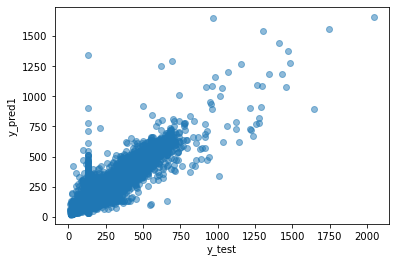

In [87]:
plt.scatter(y_test1, y_pred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [89]:
print("MSE:",mean_squared_error(y_pred1,y_test1))
print("MAE:",mean_absolute_error(y_pred1,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(y_pred1,y_test1)))

MSE: 1590.6607284657389
MAE: 20.03185613199253
RMSE: 39.88308825135961


In [90]:
cla_prediction=rfc.predict([[66.22,66.22,4.33,60.01,64.31,0.75,13.56,178.47,0.36,1.44,0.40]])
if cla_prediction==1:
  print("Air Quality Index Moderate")
elif cla_prediction==2:
  print("Air Quality Index Poor")
elif cla_prediction==3:
  print("Air Quality Index Very Poor")
elif cla_prediction==4:
  print("Air Quality Index Satisfactory")
elif cla_prediction==5:
  print("Air Quality Index Good")
elif cla_prediction==6:
  print("Air Quality Index Severe")
else:
  print("Air Quality Index belong to other category")
reg_prediction=rfr.predict([[66.22,66.22,4.33,60.01,64.31,0.75,13.56,178.47,0.36,1.44,0.40]])
print("Air Quality Index Value:",reg_prediction)

Air Quality Index Poor
Air Quality Index Value: [279.94]


In [91]:
import pickle

In [92]:
pickle.dump(rfr,open('AQI_new_model5.pkl','wb'))

In [93]:
pickle.dump(rfc,open('AQI_new_classifier_model6.pkl','wb'))